In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as im
import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,Activation
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
import cv2
img = im.imread('/kaggle/input/animals10/raw-img/gatto/123.jpeg')
print(img.shape)
plt.imshow(img)
img = cv2.resize(img,(75,75))
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
import os
os.listdir('/kaggle/input/animals10/raw-img')
#classes

In [2]:
target_size=(75,75)
batch_size=1000
data_generator = ImageDataGenerator(rescale=1/255,validation_split=0.25)
train_data = data_generator.flow_from_directory('train',subset='training',target_size=target_size,batch_size=batch_size,class_mode='categorical',color_mode='grayscale')
test_data = data_generator.flow_from_directory('train',subset='validation',target_size=target_size,batch_size=batch_size,class_mode='categorical',color_mode='grayscale')

Found 246 images belonging to 4 classes.
Found 81 images belonging to 4 classes.


TypeError: Invalid shape (75, 75, 1) for image data

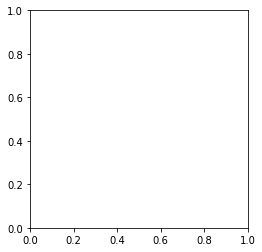

In [4]:
count  = 0 

for i in train_data:
    for j in i[0]:
        imk = j
        break
           
    break   
plt.imshow(imk)

In [7]:
''''model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=(75,75,1),activation = 'relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(32,(5,5),activation = 'relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
'''
#Alexnet model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (75, 75,1)))
model.add(Dropout(0.4))
model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))
model
model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4, activation = "softmax"))

#model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
mod=model.fit(train_data,validation_data=test_data,shuffle=True,epochs=15,steps_per_epoch=19638 //batch_size,validation_steps=6541//batch_size,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)])

Epoch 1/15
19/19 [==============================] - 16s 842ms/step - loss: 0.1644 - accuracy: 0.9427 - val_loss: 1.6201 - val_accuracy: 0.3827
Epoch 2/15
19/19 [==============================] - 15s 807ms/step - loss: 0.0333 - accuracy: 0.9927 - val_loss: 1.7478 - val_accuracy: 0.4568
Epoch 3/15
19/19 [==============================] - 15s 802ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 1.9641 - val_accuracy: 0.4321
Epoch 4/15
19/19 [==============================] - 15s 813ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 2.1095 - val_accuracy: 0.4321
Epoch 5/15
19/19 [==============================] - 15s 797ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 2.2720 - val_accuracy: 0.4444


In [9]:
mod.history

{'val_loss': [1.2475441694259644,
  1.204925537109375,
  1.1600631475448608,
  1.1270662546157837,
  1.1443949937820435,
  1.3517969846725464,
  1.7219810485839844,
  1.923261046409607],
 'val_accuracy': [0.34567901492118835,
  0.34567901492118835,
  0.37037035822868347,
  0.4444444477558136,
  0.43209877610206604,
  0.4444444477558136,
  0.43209877610206604,
  0.4444444477558136],
 'loss': [1.0925124569943077,
  0.9931532709222091,
  0.9178282775376972,
  0.7611246485459177,
  0.6303925859300714,
  0.2755992098858482,
  0.09121207539972506,
  0.04122580803538624],
 'accuracy': [0.40864357,
  0.5222508,
  0.57723576,
  0.6668806,
  0.7483954,
  0.893881,
  0.9676936,
  0.9856654]}

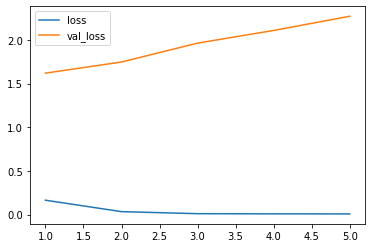

In [13]:
epoch = len(mod.history['val_loss'])

plt.plot(range(1,epoch+1),mod.history['loss'],label='loss')
plt.plot(range(1,epoch+1),mod.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

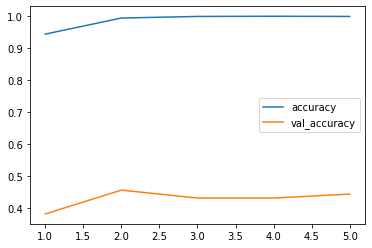

In [14]:
plt.plot(range(1,epoch+1),mod.history['accuracy'],label='accuracy')
plt.plot(range(1,epoch+1),mod.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [21]:
model.predict('train/canine')

AttributeError: 'str' object has no attribute 'ndim'